## [pyKNEEr](https://github.com/sbonaretti/pyKNEEr)

# [Segmentation quality](https://sbonaretti.github.io/pyKNEEr/segmentation.html)
Content under Creative Commons Attribution license CC-BY-NC 4.0   
Code under GNU-GPL v3 License  
© 2019 Serena Bonaretti
---

Segmentation quality is evaluated using 3 overlap agreement measures [1]:  
- Dice coefficient  
- Jaccard coefficient 
- Volume similarity  

and one measure of surface distance

---

*Automatic data download for the reproducibility of this notebook:*
- Download input images from Zenodo and image file list from GitHub:

In [ ]:
import os
import wget
from zipfile import ZipFile 

In [ ]:
# local folder  
local_folder_name  = "./OAI2/"
# Zenodo variables
input_URL          = "https://zenodo.org/record/2583184/files/"
zipped_folder_name = "OAI2_segmented.zip" 
zipped_gt_name     = "OAI2_segmented_IM.zip"
local_gt_name      = "/segmented_IM"
# GitHub variables
raw_url            = "https://raw.githubusercontent.com/sbonaretti/pyKNEEr/master/publication/data/"
input_file_name    = "image_list_segmentation_quality_OAI2_BL.txt"

In [ ]:
# create local folder for dataset
if not os.path.isdir(local_folder_name):
    os.mkdir(local_folder_name)
    print ("folder " + local_folder_name + " created")

In [ ]:
# download zipped folder from Zenodo
wget.download(input_URL + zipped_folder_name, local_folder_name + zipped_folder_name) 

In [ ]:
# download ground truth images
wget.download(input_URL + zipped_gt_name, local_folder_name + zipped_gt_name)

In [ ]:
# unzip image folder
with ZipFile(local_folder_name + zipped_folder_name, 'r') as zip: 
    zip.extractall(local_folder_name) 

In [ ]:
# unzip ground truth images
with ZipFile(local_folder_name + zipped_gt_name, 'r') as zip: 
    zip.extractall(local_folder_name) 

In [ ]:
# download input file from GitHub
wget.download(raw_url + input_file_name, "./" + input_file_name)

---

## Import packages

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pykneer import pykneer_io                  as io
from pykneer import segmentation_quality_for_nb as sq

## Image information

Input and output:   
- `input_file_name` contains the list of the masks segmented using pyKNEEr and of ground truth masks
- `output_file_name` contains the table of the overlap coefficients

In [3]:
# input_file_name  = "./image_list_segmentation_quality_OAI2_BL.txt" # commented out because downloaded from GitHub
input_file_name            = "/Volumes/SereHD/work/data_pyKNEEr/image_list_segmentation_quality_OAI2_BL.txt"
output_file_name_overlap   = "overlapCoeff_OAI2_BL.csv"
output_file_name_distances = "average_distances_OAI2_BL.csv"

#### Reading image data
- `image_data` is a dictionary (or struct), where each cell corresponds to an image. For each image, information such as paths and file names are stored  

In [4]:
image_data = io.load_image_data_segmentation_quality(input_file_name)

-> image information loaded


---

## Calculating overlap coefficients

In [5]:
dice_coeff, jacc_coeff, vol_simil = sq.compute_overlap(image_data)

## Visualizing overlap coefficients

The values of overlap coefficient are visualized as:
- a GRAPH, to visually observe the trend of the dataset 
- a TABLE, to observe the numerical values

#### GRAPH: Dots represent the coefficient value

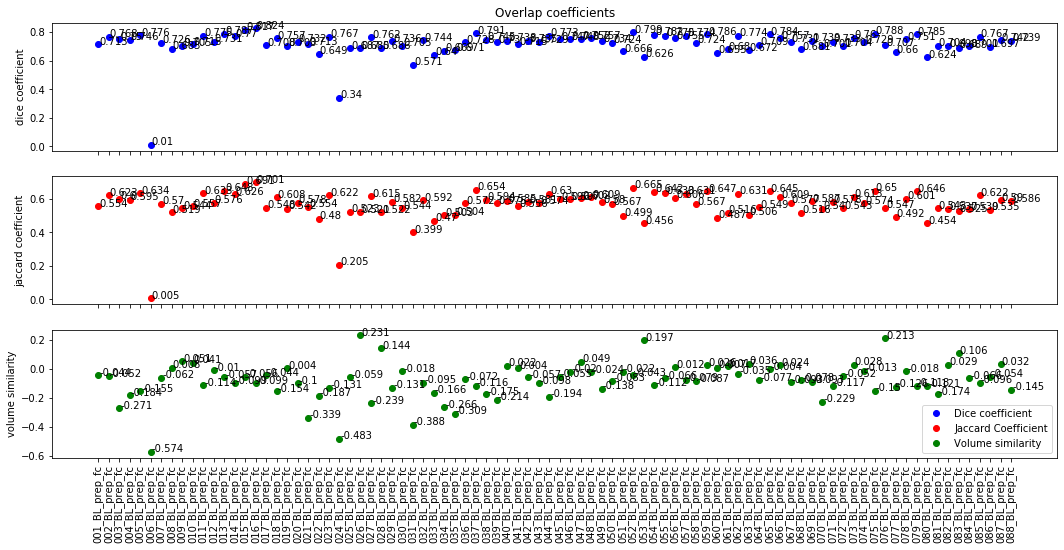

In [6]:
sq.overlap_coeff_graph(image_data, dice_coeff, jacc_coeff, vol_simil)

#### TABLE: Overlap coefficients per image
The table is saved as a .csv file for subsequent analyisis

In [7]:
coeff = sq.overlap_coeff_table(image_data, dice_coeff, jacc_coeff, vol_simil, output_file_name_overlap)
display(coeff)

Table saved as: overlapCoeff_OAI2_BL.csv


,subjects,dice_coeff,jaccard_coeff,volume_similarity
1,001_BL_prep_fc,0.71,0.55,-0.04
2,002_BL_prep_fc,0.77,0.62,-0.05
3,003_BL_prep_fc,0.75,0.60,-0.27
4,004_BL_prep_fc,0.75,0.60,-0.18
5,005_BL_prep_fc,0.78,0.63,-0.15
6,006_BL_prep_fc,0.01,0.01,-0.57
7,007_BL_prep_fc,0.73,0.57,-0.06
8,008_BL_prep_fc,0.68,0.52,0.01
9,009_BL_prep_fc,0.70,0.54,0.05
10,010_BL_prep_fc,0.72,0.56,0.04


---

## Calculating surface distances

In [8]:
mean_distances, stddev_distances = sq.compute_surface_distance(image_data)

## Visualizing surface distances

The values of surface distances are visualized as:
- a GRAPH, to visually observe the trend of the dataset 
- a TABLE, to observe the numerical values

#### GRAPH: Dots represent the mean surface distance

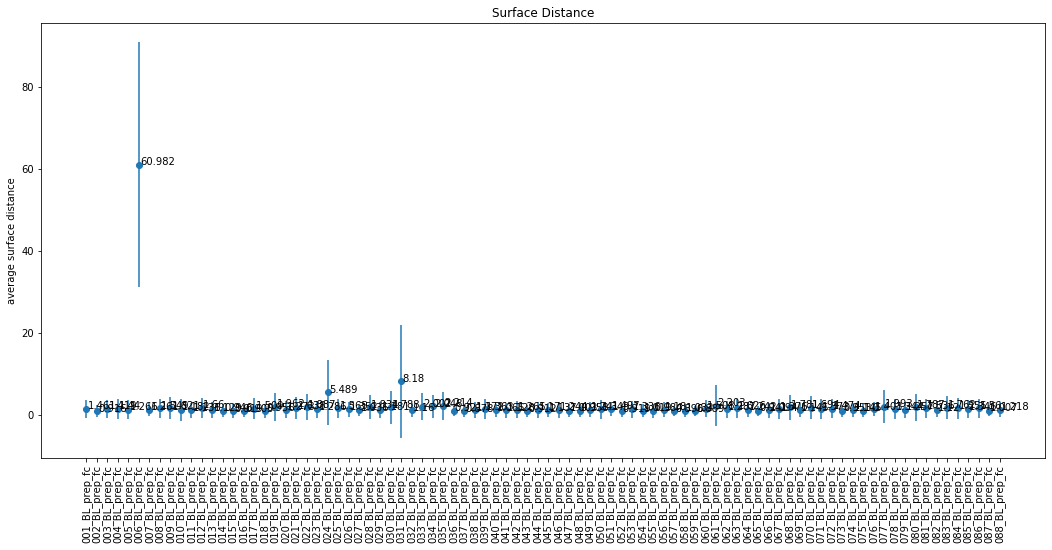

In [9]:
sq.surface_distance_graph(image_data, mean_distances, stddev_distances)

#### TABLE: Average distances per image
The table is saved as a .csv file for subsequent analyisis

In [10]:
table = sq.surface_distance_table(image_data, mean_distances, stddev_distances, output_file_name_distances)
display(table)

Table saved as: average_distances_OAI2_BL.csv


,subjects,mean_distances,stddev_distances
1,001_BL_prep_fc,1.46,2.18
2,002_BL_prep_fc,0.92,1.46
3,003_BL_prep_fc,1.42,2.14
4,004_BL_prep_fc,1.44,2.38
5,005_BL_prep_fc,1.27,2.26
6,006_BL_prep_fc,60.98,29.79
7,007_BL_prep_fc,1.26,1.65
8,008_BL_prep_fc,1.55,2.28
9,009_BL_prep_fc,1.62,2.73
10,010_BL_prep_fc,1.18,2.59


---

### References

[1] Tustison N.J., Gee J.C. [*Introducing Dice, Jaccard, and Other Label Overlap Measures To ITK*](http://insight-journal.org/browse/publication/707) The Insight Journal. July-December. 2009.

### Dependencies

In [11]:
%load_ext watermark
%watermark -v -m -p pykneer,SimpleITK,matplotlib,numpy,pandas
print (" ")
%watermark -u -n -t -z

CPython 3.7.3
IPython 7.8.0

pykneer 0.0.4
SimpleITK 1.2.2
matplotlib 3.1.1
numpy 1.17.2
pandas 0.25.1

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 17.7.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit
 
last updated: Mon Oct 14 2019 12:27:10 CEST
